## Section 1: Import Libraries and Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')
print("Libraries imported successfully!")

Libraries imported successfully!


## Section 2: Key Differences Between Z-Test and t-Test

### Z-Test Characteristics:
- **Population Standard Deviation**: KNOWN (σ is known)
- **Sample Size**: Large samples (n ≥ 30) OR any sample size if σ is known
- **Distribution**: Normal distribution (Z-distribution)
- **Degrees of Freedom**: Not applicable (fixed)
- **When to Use**: When you know the population standard deviation
- **Formula**: $Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$

### t-Test Characteristics:
- **Population Standard Deviation**: UNKNOWN (only sample standard deviation s is known)
- **Sample Size**: Small samples (n < 30) OR when σ is unknown
- **Distribution**: t-distribution (depends on degrees of freedom)
- **Degrees of Freedom**: df = n - 1 (affects the shape of the distribution)
- **When to Use**: When you don't know the population standard deviation
- **Formula**: $t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

In [3]:
# Create a comparison table
comparison_data = {
    'Feature': [
        'Population Std Dev (σ)',
        'Sample Std Dev (s)',
        'Sample Size',
        'Distribution Used',
        'Degrees of Freedom',
        'Assumptions',
        'When to Use',
        'Tail Behavior'
    ],
    'Z-Test': [
        'KNOWN',
        'Not used',
        'Any size (prefer n ≥ 30)',
        'Normal Distribution (Z)',
        'N/A (fixed)',
        'Population is normal or n ≥ 30',
        'σ is known',
        'Thinner tails (normal dist)'
    ],
    't-Test': [
        'UNKNOWN',
        'Estimated from sample',
        'Any size (especially n < 30)',
        't-Distribution (student\'s t)',
        'df = n - 1',
        'Population is normal or approximately normal',
        'σ is unknown',
        'Heavier tails (t-dist)'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + "="*100)
print("Z-TEST VS t-TEST COMPARISON")
print("="*100)
print(df_comparison.to_string(index=False))
print("="*100)


Z-TEST VS t-TEST COMPARISON
               Feature                         Z-Test                                       t-Test
Population Std Dev (σ)                          KNOWN                                      UNKNOWN
    Sample Std Dev (s)                       Not used                        Estimated from sample
           Sample Size       Any size (prefer n ≥ 30)                 Any size (especially n < 30)
     Distribution Used        Normal Distribution (Z)                 t-Distribution (student's t)
    Degrees of Freedom                    N/A (fixed)                                   df = n - 1
           Assumptions Population is normal or n ≥ 30 Population is normal or approximately normal
           When to Use                     σ is known                                 σ is unknown
         Tail Behavior    Thinner tails (normal dist)                       Heavier tails (t-dist)


## Section 3: Decision Flowchart - Which Test to Use?

In [4]:
print("\n" + "="*80)
print("DECISION FLOWCHART: WHICH TEST TO USE?")
print("="*80)
print("""
START: Testing hypothesis about population mean
  │
  ├─► Do you know the population standard deviation (σ)?
  │
  ├─── YES ──► USE Z-TEST
  │           ├─ Calculate: Z = (x̄ - μ₀) / (σ / √n)
  │           └─ Compare with Z-critical values
  │
  └─── NO ──► Is sample size n ≥ 30?
              │
              ├─── YES ──► Can use either Z-TEST or t-TEST
              │            (t-test is more conservative and preferred)
              │            ├─ Calculate: t = (x̄ - μ₀) / (s / √n)
              │            └─ Compare with t-critical values (df = n-1)
              │
              └─── NO ──► USE t-TEST (MUST USE)
                          ├─ Calculate: t = (x̄ - μ₀) / (s / √n)
                          └─ Compare with t-critical values (df = n-1)
""")
print("="*80)


DECISION FLOWCHART: WHICH TEST TO USE?

START: Testing hypothesis about population mean
  │
  ├─► Do you know the population standard deviation (σ)?
  │
  ├─── YES ──► USE Z-TEST
  │           ├─ Calculate: Z = (x̄ - μ₀) / (σ / √n)
  │           └─ Compare with Z-critical values
  │
  └─── NO ──► Is sample size n ≥ 30?
              │
              ├─── YES ──► Can use either Z-TEST or t-TEST
              │            (t-test is more conservative and preferred)
              │            ├─ Calculate: t = (x̄ - μ₀) / (s / √n)
              │            └─ Compare with t-critical values (df = n-1)
              │
              └─── NO ──► USE t-TEST (MUST USE)
                          ├─ Calculate: t = (x̄ - μ₀) / (s / √n)
                          └─ Compare with t-critical values (df = n-1)



## Section 4: Visual Comparison of Z and t Distributions

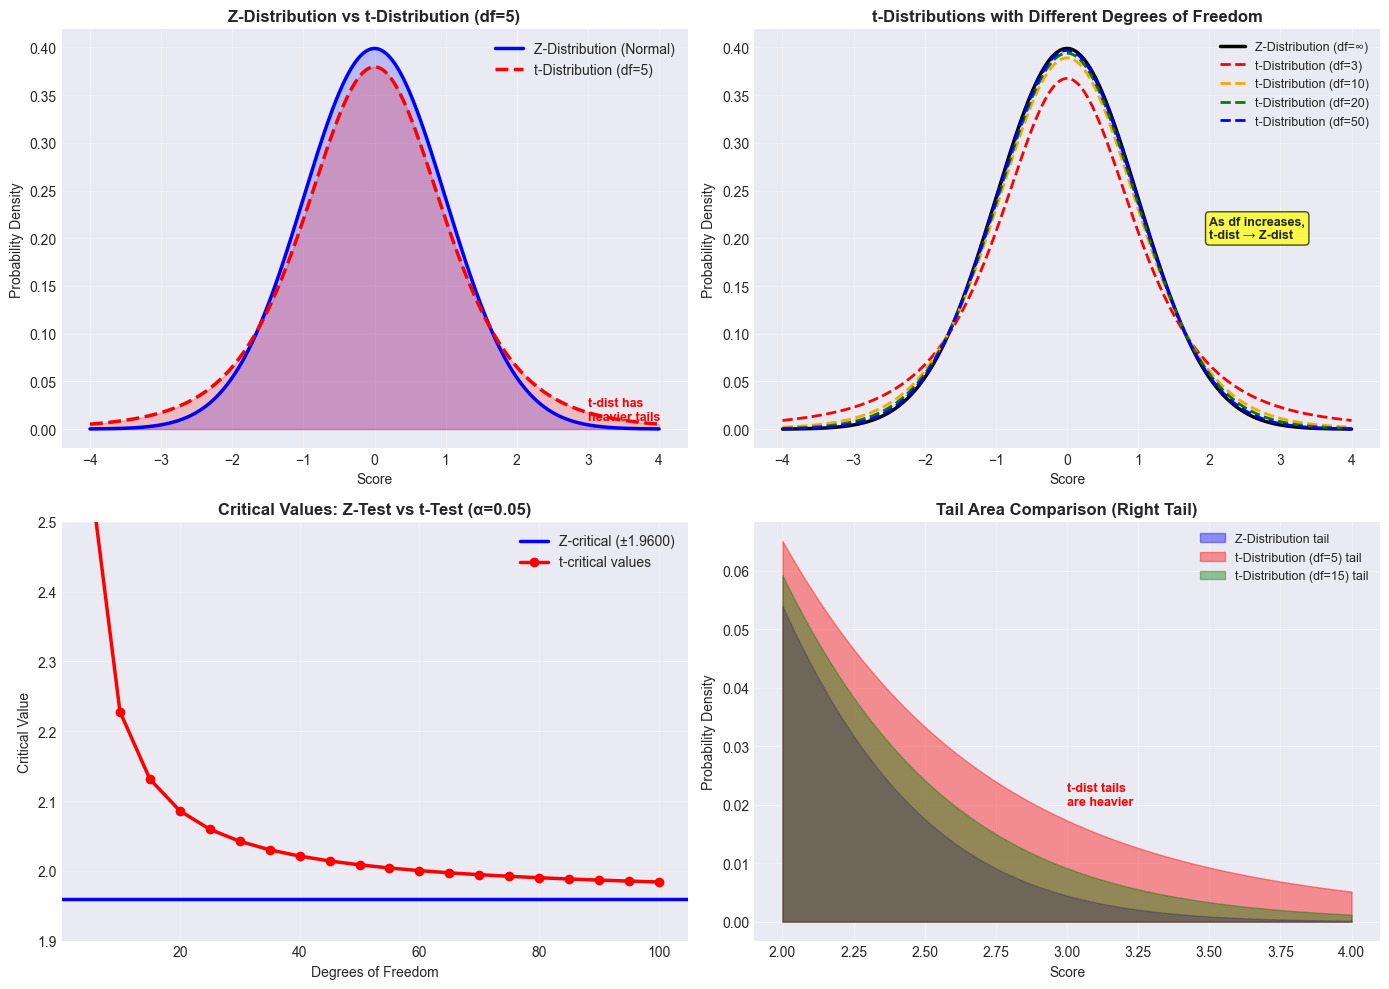

✓ Visualization saved as 'z_test_vs_t_test_distributions.png'


In [5]:
# Create comparison of Z and t distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = np.linspace(-4, 4, 1000)

# Plot 1: Z-distribution vs t-distribution (df=5)
ax = axes[0, 0]
z_dist = stats.norm.pdf(x)
t_dist_df5 = stats.t.pdf(x, df=5)

ax.plot(x, z_dist, 'b-', linewidth=2.5, label='Z-Distribution (Normal)')
ax.plot(x, t_dist_df5, 'r--', linewidth=2.5, label='t-Distribution (df=5)')
ax.fill_between(x, z_dist, alpha=0.2, color='blue')
ax.fill_between(x, t_dist_df5, alpha=0.2, color='red')
ax.set_title('Z-Distribution vs t-Distribution (df=5)', fontsize=12, fontweight='bold')
ax.set_xlabel('Score')
ax.set_ylabel('Probability Density')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.annotate('t-dist has\nheavier tails', xy=(3, 0.01), fontsize=9, color='red', fontweight='bold')

# Plot 2: t-distributions with different degrees of freedom
ax = axes[0, 1]
df_values = [3, 10, 20, 50]
colors = ['red', 'orange', 'green', 'blue']

ax.plot(x, stats.norm.pdf(x), 'k-', linewidth=2.5, label='Z-Distribution (df=∞)')
for df_val, color in zip(df_values, colors):
    ax.plot(x, stats.t.pdf(x, df_val), linestyle='--', linewidth=2, label=f't-Distribution (df={df_val})', color=color)

ax.set_title('t-Distributions with Different Degrees of Freedom', fontsize=12, fontweight='bold')
ax.set_xlabel('Score')
ax.set_ylabel('Probability Density')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.annotate('As df increases,\nt-dist → Z-dist', xy=(2, 0.2), fontsize=9, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Plot 3: Critical values comparison
ax = axes[1, 0]
alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)
df_range = np.arange(5, 101, 5)
t_crit_values = [stats.t.ppf(1 - alpha/2, df) for df in df_range]

ax.axhline(z_crit, color='blue', linestyle='-', linewidth=2.5, label=f'Z-critical (±{z_crit:.4f})')
ax.plot(df_range, t_crit_values, 'r-', linewidth=2.5, marker='o', markersize=6, label='t-critical values')
ax.set_title('Critical Values: Z-Test vs t-Test (α=0.05)', fontsize=12, fontweight='bold')
ax.set_xlabel('Degrees of Freedom')
ax.set_ylabel('Critical Value')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(1.9, 2.5)

# Plot 4: Tail area comparison
ax = axes[1, 1]
x_tail = np.linspace(2, 4, 100)

z_tail = stats.norm.pdf(x_tail)
t_tail_df5 = stats.t.pdf(x_tail, df=5)
t_tail_df15 = stats.t.pdf(x_tail, df=15)

ax.fill_between(x_tail, z_tail, alpha=0.4, color='blue', label='Z-Distribution tail')
ax.fill_between(x_tail, t_tail_df5, alpha=0.4, color='red', label='t-Distribution (df=5) tail')
ax.fill_between(x_tail, t_tail_df15, alpha=0.4, color='green', label='t-Distribution (df=15) tail')

ax.set_title('Tail Area Comparison (Right Tail)', fontsize=12, fontweight='bold')
ax.set_xlabel('Score')
ax.set_ylabel('Probability Density')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.annotate('t-dist tails\nare heavier', xy=(3, 0.02), fontsize=9, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('z_test_vs_t_test_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'z_test_vs_t_test_distributions.png'")

## Section 5: Critical Values Comparison

In [6]:
# Compare critical values at different significance levels
alpha_values = [0.10, 0.05, 0.01]

print("\n" + "="*100)
print("CRITICAL VALUES COMPARISON (Two-Tailed Tests)")
print("="*100)

for alpha in alpha_values:
    z_crit = stats.norm.ppf(1 - alpha/2)
    print(f"\nSignificance Level (α) = {alpha}")
    print("-" * 70)
    print(f"{'Degrees of Freedom':<20} {'t-Critical':<15} {'Z-Critical':<15} {'Difference':<15}")
    print("-" * 70)
    
    df_values = [5, 10, 15, 20, 30, 50, 100, 1000]
    for df in df_values:
        t_crit = stats.t.ppf(1 - alpha/2, df)
        diff = t_crit - z_crit
        print(f"{df:<20} {t_crit:<15.4f} {z_crit:<15.4f} {diff:<15.4f}")
    
    print(f"{'∞ (Z-test)':<20} {z_crit:<15.4f} {z_crit:<15.4f} {'0.0000':<15}")

print("\n" + "="*100)
print("Note: As df increases, t-critical values approach Z-critical values")
print("="*100)


CRITICAL VALUES COMPARISON (Two-Tailed Tests)

Significance Level (α) = 0.1
----------------------------------------------------------------------
Degrees of Freedom   t-Critical      Z-Critical      Difference     
----------------------------------------------------------------------
5                    2.0150          1.6449          0.3702         
10                   1.8125          1.6449          0.1676         
15                   1.7531          1.6449          0.1082         
20                   1.7247          1.6449          0.0799         
30                   1.6973          1.6449          0.0524         
50                   1.6759          1.6449          0.0311         
100                  1.6602          1.6449          0.0154         
1000                 1.6464          1.6449          0.0015         
∞ (Z-test)           1.6449          1.6449          0.0000         

Significance Level (α) = 0.05
------------------------------------------------------------

## Section 6: Practical Example 1 - Known Population Std Dev (Z-Test)

In [7]:
print("\n" + "="*80)
print("EXAMPLE 1: Z-TEST (Population Std Dev is KNOWN)")
print("="*80)

# Problem: Quality control
print("""
Problem: A manufacturer claims the average weight of products is 500g.
Historical data shows the population standard deviation is 25g.
A sample of 36 products has a mean weight of 510g.
Test the claim at α = 0.05.
""")

mu_0 = 500
sigma = 25  # KNOWN population std dev
n = 36
x_bar = 510
alpha = 0.05

# Calculate Z-statistic
se = sigma / np.sqrt(n)
z_stat = (x_bar - mu_0) / se
z_crit = stats.norm.ppf(1 - alpha/2)
p_value = 2 * stats.norm.sf(abs(z_stat))

print(f"Given:")
print(f"  μ₀ = {mu_0}g, σ = {sigma}g (KNOWN), n = {n}, x̄ = {x_bar}g, α = {alpha}")
print(f"\nCalculation:")
print(f"  SE = σ / √n = {sigma} / √{n} = {se:.4f}")
print(f"  Z = (x̄ - μ₀) / SE = ({x_bar} - {mu_0}) / {se:.4f} = {z_stat:.4f}")
print(f"\nCritical Value: ±{z_crit:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nDecision: |Z| ({abs(z_stat):.4f}) > Z_critical ({z_crit:.4f})? {abs(z_stat) > z_crit}")
print(f"Decision: P-value ({p_value:.6f}) < α ({alpha})? {p_value < alpha}")
print(f"\nResult: {'REJECT H₀' if p_value < alpha else 'FAIL TO REJECT H₀'}")
print(f"Conclusion: The product weight is {'significantly different' if p_value < alpha else 'not significantly different'} from 500g.")
print("="*80)


EXAMPLE 1: Z-TEST (Population Std Dev is KNOWN)

Problem: A manufacturer claims the average weight of products is 500g.
Historical data shows the population standard deviation is 25g.
A sample of 36 products has a mean weight of 510g.
Test the claim at α = 0.05.

Given:
  μ₀ = 500g, σ = 25g (KNOWN), n = 36, x̄ = 510g, α = 0.05

Calculation:
  SE = σ / √n = 25 / √36 = 4.1667
  Z = (x̄ - μ₀) / SE = (510 - 500) / 4.1667 = 2.4000

Critical Value: ±1.9600
P-value: 0.016395

Decision: |Z| (2.4000) > Z_critical (1.9600)? True
Decision: P-value (0.016395) < α (0.05)? True

Result: REJECT H₀
Conclusion: The product weight is significantly different from 500g.


## Section 7: Practical Example 2 - Unknown Population Std Dev, Small Sample (t-Test)

In [8]:
print("\n" + "="*80)
print("EXAMPLE 2: t-TEST (Population Std Dev is UNKNOWN, Small Sample)")
print("="*80)

# Problem: Testing battery life
print("""
Problem: A battery manufacturer claims the average battery life is 800 hours.
A sample of 12 batteries is tested with the following results:
Sample mean = 780 hours, Sample std dev = 40 hours
Test the claim at α = 0.05.
""")

mu_0 = 800
n = 12  # Small sample!
s = 40  # Sample std dev (NOT population std dev)
x_bar = 780
alpha = 0.05
df = n - 1

# Calculate t-statistic
se = s / np.sqrt(n)
t_stat = (x_bar - mu_0) / se
t_crit = stats.t.ppf(1 - alpha/2, df)
p_value = 2 * stats.t.sf(abs(t_stat), df)

print(f"Given:")
print(f"  μ₀ = {mu_0} hours, s = {s} hours (sample std dev, UNKNOWN σ)")
print(f"  n = {n} (SMALL SAMPLE - must use t-test!), x̄ = {x_bar} hours, α = {alpha}")
print(f"\nCalculation:")
print(f"  df = n - 1 = {df}")
print(f"  SE = s / √n = {s} / √{n} = {se:.4f}")
print(f"  t = (x̄ - μ₀) / SE = ({x_bar} - {mu_0}) / {se:.4f} = {t_stat:.4f}")
print(f"\nCritical Value (df={df}): ±{t_crit:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nDecision: |t| ({abs(t_stat):.4f}) > t_critical ({t_crit:.4f})? {abs(t_stat) > t_crit}")
print(f"Decision: P-value ({p_value:.6f}) < α ({alpha})? {p_value < alpha}")
print(f"\nResult: {'REJECT H₀' if p_value < alpha else 'FAIL TO REJECT H₀'}")
print(f"Conclusion: The battery life is {'significantly different' if p_value < alpha else 'not significantly different'} from 800 hours.")
print("="*80)


EXAMPLE 2: t-TEST (Population Std Dev is UNKNOWN, Small Sample)

Problem: A battery manufacturer claims the average battery life is 800 hours.
A sample of 12 batteries is tested with the following results:
Sample mean = 780 hours, Sample std dev = 40 hours
Test the claim at α = 0.05.

Given:
  μ₀ = 800 hours, s = 40 hours (sample std dev, UNKNOWN σ)
  n = 12 (SMALL SAMPLE - must use t-test!), x̄ = 780 hours, α = 0.05

Calculation:
  df = n - 1 = 11
  SE = s / √n = 40 / √12 = 11.5470
  t = (x̄ - μ₀) / SE = (780 - 800) / 11.5470 = -1.7321

Critical Value (df=11): ±2.2010
P-value: 0.111173

Decision: |t| (1.7321) > t_critical (2.2010)? False
Decision: P-value (0.111173) < α (0.05)? False

Result: FAIL TO REJECT H₀
Conclusion: The battery life is not significantly different from 800 hours.


## Section 8: Why Heavy Tails Matter in t-Distribution

In [9]:
print("\n" + "="*80)
print("WHY DOES THE t-DISTRIBUTION HAVE HEAVIER TAILS?")
print("="*80)
print("""
Reason: When estimating the population standard deviation from a sample:
  • Small samples have MORE uncertainty in the estimate of σ
  • This uncertainty is reflected in the wider/heavier tails of t-distribution
  • The t-distribution accounts for this extra uncertainty

Consequences:
  1. t-critical values are LARGER than Z-critical values
     → It's harder to reject H₀ with t-test (more conservative)
  2. p-values from t-test are generally LARGER than from Z-test
  3. As sample size increases (df → ∞), t-distribution → Z-distribution

Benefit:
  • t-test is more appropriate for small samples
  • It doesn't underestimate uncertainty due to small sample size
""")
print("="*80)

# Demonstrate the effect
print("\nDemonstration: Same data with Z-test vs t-test\n")

alpha = 0.05
n = 15
x_bar = 105
mu_0 = 100
s = 10

z_stat = (x_bar - mu_0) / (s / np.sqrt(n))
t_stat = z_stat  # Same test statistic value
df = n - 1

z_crit = stats.norm.ppf(1 - alpha/2)
t_crit = stats.t.ppf(1 - alpha/2, df)

z_p_value = 2 * stats.norm.sf(abs(z_stat))
t_p_value = 2 * stats.t.sf(abs(t_stat), df)

print(f"Test Statistic Value: {z_stat:.4f}")
print(f"\nZ-Test (assuming σ known):")
print(f"  Critical Value: ±{z_crit:.4f}")
print(f"  P-value: {z_p_value:.6f}")
print(f"  Decision: {'REJECT H₀' if z_p_value < alpha else 'FAIL TO REJECT H₀'}")
print(f"\nt-Test (σ unknown, df={df}):")
print(f"  Critical Value: ±{t_crit:.4f}")
print(f"  P-value: {t_p_value:.6f}")
print(f"  Decision: {'REJECT H₀' if t_p_value < alpha else 'FAIL TO REJECT H₀'}")
print(f"\nDifference:")
print(f"  t-critical is {t_crit - z_crit:.4f} LARGER than Z-critical")
print(f"  t p-value is {t_p_value - z_p_value:.6f} LARGER than Z p-value")
print(f"  → t-test is more conservative (harder to reject H₀)")


WHY DOES THE t-DISTRIBUTION HAVE HEAVIER TAILS?

Reason: When estimating the population standard deviation from a sample:
  • Small samples have MORE uncertainty in the estimate of σ
  • This uncertainty is reflected in the wider/heavier tails of t-distribution
  • The t-distribution accounts for this extra uncertainty

Consequences:
  1. t-critical values are LARGER than Z-critical values
     → It's harder to reject H₀ with t-test (more conservative)
  2. p-values from t-test are generally LARGER than from Z-test
  3. As sample size increases (df → ∞), t-distribution → Z-distribution

Benefit:
  • t-test is more appropriate for small samples
  • It doesn't underestimate uncertainty due to small sample size


Demonstration: Same data with Z-test vs t-test

Test Statistic Value: 1.9365

Z-Test (assuming σ known):
  Critical Value: ±1.9600
  P-value: 0.052808
  Decision: FAIL TO REJECT H₀

t-Test (σ unknown, df=14):
  Critical Value: ±2.1448
  P-value: 0.073258
  Decision: FAIL TO REJE

## Section 9: Quick Reference Guide

In [10]:
print("\n" + "="*100)
print("QUICK REFERENCE GUIDE")
print("="*100)

reference_table = pd.DataFrame({
    'Situation': [
        '1. Population σ is KNOWN',
        '2. Population σ UNKNOWN + n ≥ 30',
        '3. Population σ UNKNOWN + n < 30',
        '4. Testing differences (2 groups)',
        '5. Very small sample (n < 10)'
    ],
    'Test to Use': [
        'Z-Test',
        't-Test preferred (Z-test acceptable)',
        't-Test (MUST USE)',
        'Two-sample t-test',
        't-Test (assumption: normal population)'
    ],
    'Why': [
        'σ is available and reliable',
        'Large sample estimates σ well; t-test is safer',
        'Small sample has high uncertainty in σ estimate',
        'Compares means of two populations',
        'No other good option available'
    ]
})

print(reference_table.to_string(index=False))
print("\n" + "="*100)


QUICK REFERENCE GUIDE
                        Situation                            Test to Use                                             Why
         1. Population σ is KNOWN                                 Z-Test                     σ is available and reliable
 2. Population σ UNKNOWN + n ≥ 30   t-Test preferred (Z-test acceptable)  Large sample estimates σ well; t-test is safer
 3. Population σ UNKNOWN + n < 30                      t-Test (MUST USE) Small sample has high uncertainty in σ estimate
4. Testing differences (2 groups)                      Two-sample t-test               Compares means of two populations
    5. Very small sample (n < 10) t-Test (assumption: normal population)                  No other good option available



## Section 10: Summary Table - When to Use Which Test

In [11]:
print("\n" + "="*100)
print("COMPREHENSIVE DECISION TABLE")
print("="*100)

decision_data = {
    'Know σ?': ['YES', 'YES', 'NO', 'NO', 'NO'],
    'Sample Size': ['Any', 'Any', 'n ≥ 30', 'n < 30', 'Very Small'],
    'Distribution of\nPopulation': ['Any', 'Any', 'Normal or ~Normal', 'Normal', 'Normal'],
    'Test Type': ['Z-Test', 'Z-Test', 't-Test', 't-Test', 't-Test'],
    'Confidence Level': ['High', 'High', 'High', 'High', 'Moderate*'],
    'Notes': [
        'Standard approach',
        'Known σ is reliable',
        'Central Limit Theorem applies',
        'Accounts for σ uncertainty',
        '*Requires normality assumption'
    ]
}

df_decision = pd.DataFrame(decision_data)
print(df_decision.to_string(index=False))
print("\n" + "="*100)


COMPREHENSIVE DECISION TABLE
Know σ? Sample Size Distribution of\nPopulation Test Type Confidence Level                          Notes
    YES         Any                         Any    Z-Test             High              Standard approach
    YES         Any                         Any    Z-Test             High            Known σ is reliable
     NO      n ≥ 30           Normal or ~Normal    t-Test             High  Central Limit Theorem applies
     NO      n < 30                      Normal    t-Test             High     Accounts for σ uncertainty
     NO  Very Small                      Normal    t-Test        Moderate* *Requires normality assumption



## Final Summary

### Key Takeaways:

1. **Z-Test**: Use when population standard deviation (σ) is KNOWN
2. **t-Test**: Use when population standard deviation (σ) is UNKNOWN

3. **Critical Difference**: 
   - t-distribution has heavier tails than normal distribution
   - This makes t-test more conservative (harder to reject H₀)
   - Accounts for uncertainty in estimating σ from sample

4. **Sample Size Impact**:
   - t-test is essential for small samples (n < 30)
   - For large samples (n ≥ 30), t-test and Z-test give similar results
   - As n → ∞, t-distribution → normal distribution

5. **Practical Advice**:
   - When in doubt, use t-test (it's more conservative)
   - Always check your data and assumptions
   - Report both the test statistic and p-value

### Formula Comparison:
- **Z-Test**: $Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$ (σ known)
- **t-Test**: $t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$ (s estimated from sample, df = n-1)